In [1]:
# Importing all Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Loading the dataset
df=pd.read_csv("adult_data.csv",sep=",",names=["age","workclass","fnlwgt","education","education-num","marital-status",
                                               "occupation","relationship","race","sex","capital-gain","capital-loss",
                                               "hours-per-week","native-country","Annual_Income"],header=0)
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Annual_Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
# shape of the data
df.shape

(32560, 15)

In [4]:
# data types
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
Annual_Income     object
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32560 non-null  int64 
 1   workclass       32560 non-null  object
 2   fnlwgt          32560 non-null  int64 
 3   education       32560 non-null  object
 4   education-num   32560 non-null  int64 
 5   marital-status  32560 non-null  object
 6   occupation      32560 non-null  object
 7   relationship    32560 non-null  object
 8   race            32560 non-null  object
 9   sex             32560 non-null  object
 10  capital-gain    32560 non-null  int64 
 11  capital-loss    32560 non-null  int64 
 12  hours-per-week  32560 non-null  int64 
 13  native-country  32560 non-null  object
 14  Annual_Income   32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


Now, the summary shows that there is no missing values in the dataset

# Summary Statistics

In [45]:
# Summary of numerical variables of the dataset
df.describe()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Annual_Income
count,32560.000000,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,3.868796,1.897818e+05,10.298249,10.080590,2.611794,6.572912,1.446376,3.665848,0.669195,1077.615172,87.306511,40.437469,36.718796,0.240817
std,13.640642,1.455879,1.055498e+05,3.870317,2.572709,1.506225,4.228809,1.606794,0.848817,0.470510,7385.402999,402.966116,12.347618,7.823892,0.427586
min,17.000000,0.000000,1.228500e+04,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,28.000000,4.000000,1.178315e+05,9.000000,9.000000,2.000000,3.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,39.000000,0.000000
50%,37.000000,4.000000,1.783630e+05,11.000000,10.000000,2.000000,7.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,39.000000,0.000000
75%,48.000000,4.000000,2.370545e+05,12.000000,12.000000,4.000000,10.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,39.000000,0.000000
max,90.000000,8.000000,1.484705e+06,15.000000,16.000000,6.000000,14.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,41.000000,1.000000


In [46]:
# checking for null values
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
Annual_Income     0
dtype: int64

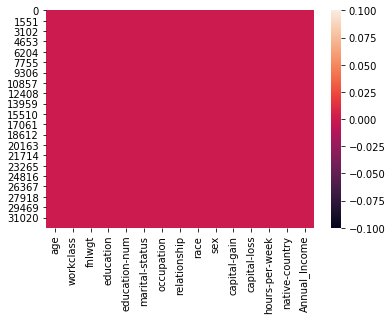

In [8]:
# checking null values using heatmap
sns.heatmap(df.isnull())

above heatmap shows that there is no null values in the dataset

In [9]:
# checking for unique values in our target column
df["Annual_Income"].unique()

array([' <=50K', ' >50K'], dtype=object)

In [10]:
df["Annual_Income"].value_counts()

 <=50K    24719
 >50K      7841
Name: Annual_Income, dtype: int64

i.e. 24,719 people are earning < 50K and only 7841 people are earning more than 50k in a year

# Exploratory Data Analysis

 Univariate Analysis

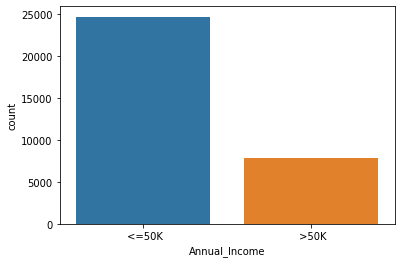

In [12]:
sns.countplot(df["Annual_Income"])

 here also we can see that there are more proportion of people earning less than 50K than that of earning more than 50K

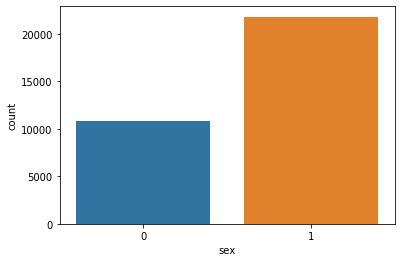

In [49]:
sns.countplot(df["sex"])

 more no. of females in our dataset as compared to males

# Bivariate Analysis

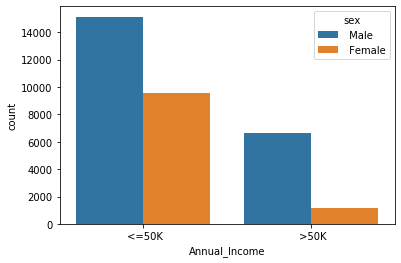

In [13]:
sns.countplot(df["Annual_Income"],hue="sex",data=df)

 From above graph we can interpret that there are more no. of males earning more than that of 50k as compared to females 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

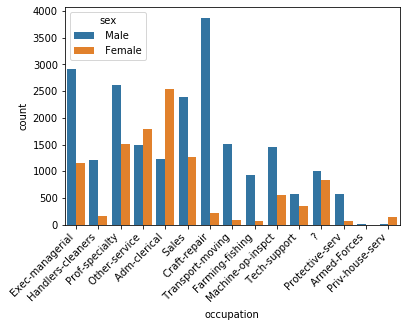

In [14]:
# plotting graph of people belonging to different occupational background differentiating them on the basis of their sex
sns.countplot("occupation",hue="sex",data=df)
plt.xticks(rotation=45,ha="right")

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

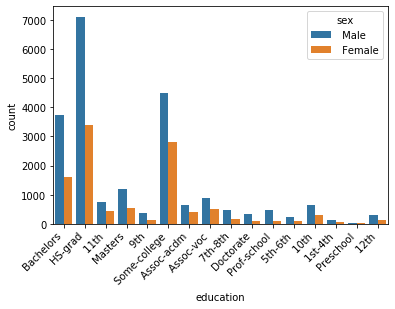

In [15]:
sns.countplot("education",hue="sex",data=df)
plt.xticks(rotation=45,ha="right")

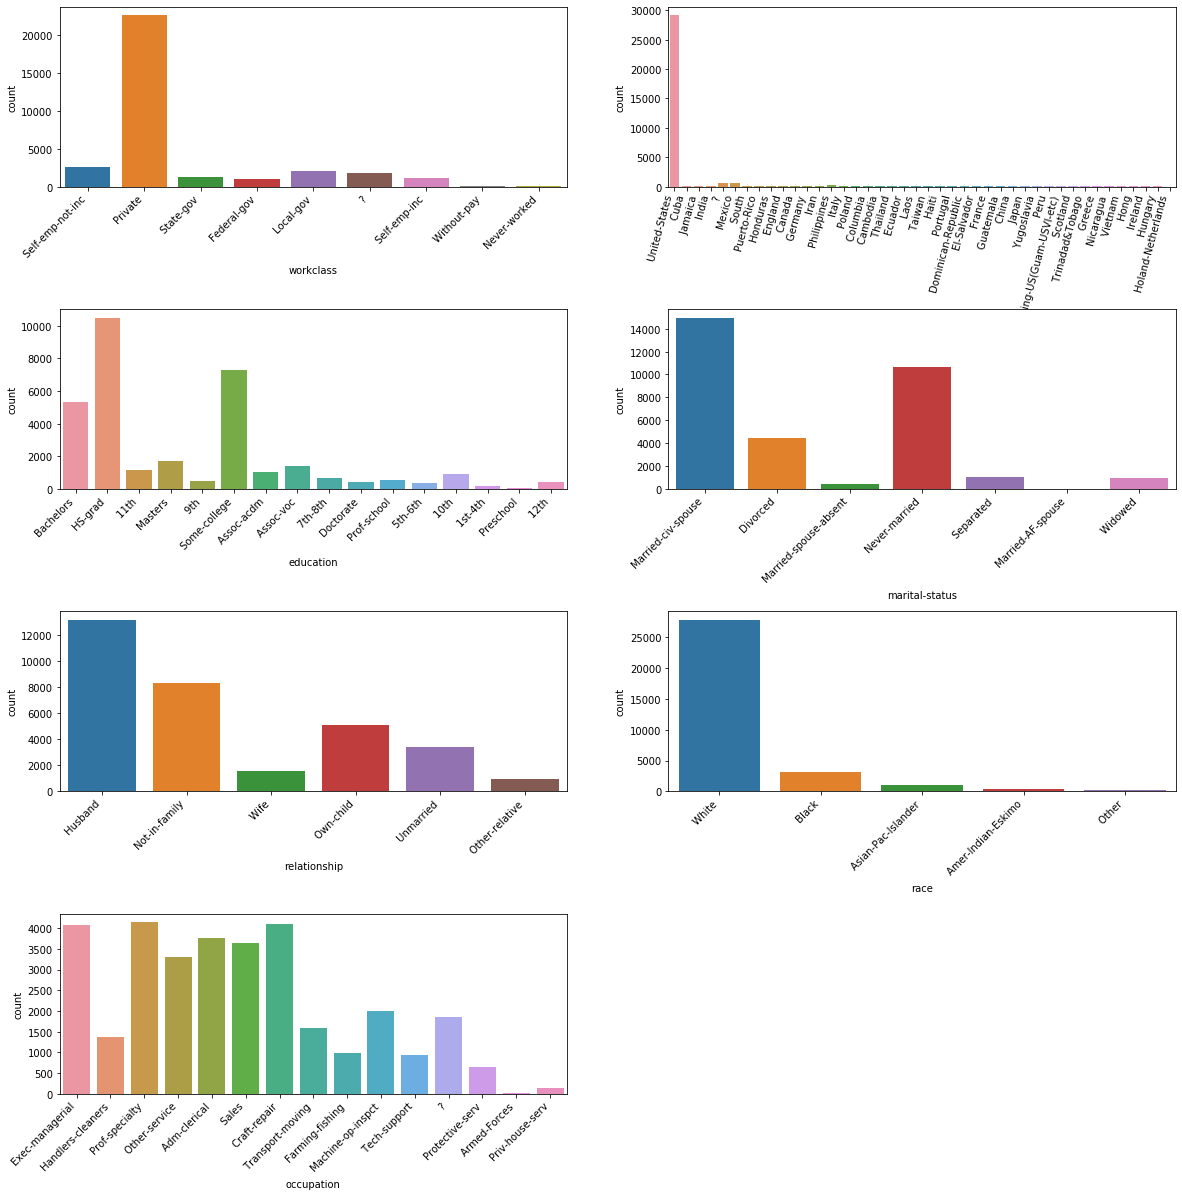

In [16]:
fig, axs = plt.subplots(ncols=2, nrows=4, figsize=(20, 20))
plt.subplots_adjust(hspace=0.68)
fig.delaxes(axs[3][1])



# Workclass
wc_plot = sns.countplot(df['workclass'], ax=axs[0][0])
wc_plot.set_xticklabels(wc_plot.get_xticklabels(), rotation=45, ha="right")

# Native country
nc_plot = sns.countplot(df['native-country'], ax=axs[0][1])
nc_plot.set_xticklabels(nc_plot.get_xticklabels(), rotation=75, ha="right")

# Education
ed_plot = sns.countplot(df['education'],ax=axs[1][0])
ed_plot.set_xticklabels(ed_plot.get_xticklabels(), rotation=45, ha="right")

# Marital status
ms_plot = sns.countplot(df['marital-status'], ax=axs[1][1])
ms_plot.set_xticklabels(ms_plot.get_xticklabels(), rotation=45, ha="right")

# Relationship
rel_plot = sns.countplot(df['relationship'], ax=axs[2][0])
rel_plot.set_xticklabels(rel_plot.get_xticklabels(), rotation=45, ha="right")

# Race
race_plot = sns.countplot(df['race'], ax=axs[2][1])
race_plot.set_xticklabels(race_plot.get_xticklabels(), rotation=45, ha="right")

# Occupation
occ_plot = sns.countplot(df['occupation'], ax=axs[3][0])
occ_plot.set_xticklabels(occ_plot.get_xticklabels(), rotation=45, ha="right")

plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

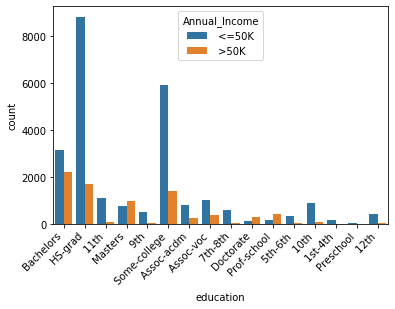

In [17]:
## plotting graph of people belonging to different educational background differentiating them on the basis of their annual income
sns.countplot(df["education"],hue=df["Annual_Income"])
plt.xticks(rotation=45,ha="right")

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

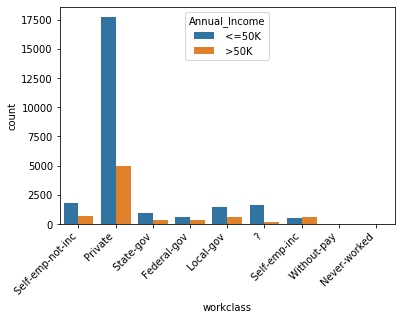

In [18]:
# plotting graph of people belonging to different workclass background differentiating them on the basis of their annual income
sns.countplot(df["workclass"],hue=df["Annual_Income"])
plt.xticks(rotation=45,ha="right")

In [20]:
# Using LabelEncoder converting the labels into numeric form so as to convert it into the machine-readable form.
le = LabelEncoder()

for column in df.columns:
    if df[column].dtype == object:
        df[column]=le.fit_transform(df[column])

In [21]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Annual_Income
0,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
1,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
2,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
3,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0
4,37,4,284582,12,14,2,4,5,4,0,0,0,40,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,4,257302,7,12,2,13,5,4,0,0,0,38,39,0
32556,40,4,154374,11,9,2,7,0,4,1,0,0,40,39,1
32557,58,4,151910,11,9,6,1,4,4,0,0,0,40,39,0
32558,22,4,201490,11,9,4,1,3,4,1,0,0,20,39,0


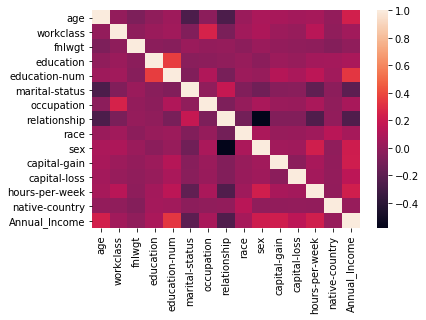

In [22]:
sns.heatmap(df.corr())

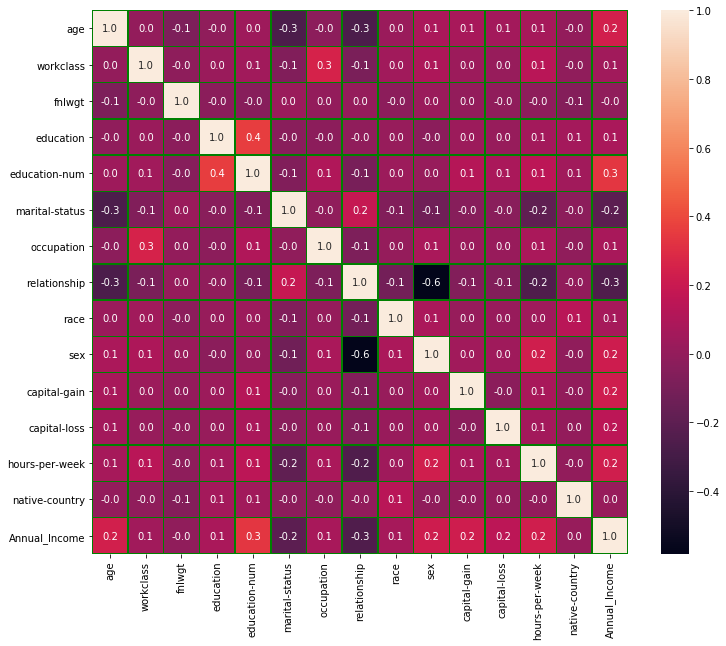

In [51]:
# Checking correlation using heatmap
f,ax=plt.subplots(figsize=(12,10))
sns.heatmap(df.corr(),annot=True,linewidths=0.5,linecolor="green",fmt=".1f",ax=ax)
plt.show()

 there is good correlation between education-num and Annual_Income of people

In [24]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'Annual_Income'],
      dtype='object')

In [25]:
#Splitting the dependent and independent variables here
df_x=df.drop("Annual_Income",axis=1)
y=df["Annual_Income"]

In [26]:
#scaling the input variables
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

sc=StandardScaler()
x=sc.fit_transform(df_x)
x=pd.DataFrame(x,columns=df_x.columns)


In [27]:
x

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0.837097,1.463883,-1.008742,-0.335443,1.134779,-0.406183,-0.608434,-0.900177,0.393675,0.703087,-0.145914,-0.216663,-2.222120,0.291573
1,-0.042640,0.090121,0.245046,0.181319,-0.420027,-1.734026,-0.135480,-0.277810,0.393675,0.703087,-0.145914,-0.216663,-0.035430,0.291573
2,1.057031,0.090121,0.425770,-2.402489,-1.197429,-0.406183,-0.135480,-0.900177,-1.962583,0.703087,-0.145914,-0.216663,-0.035430,0.291573
3,-0.775755,0.090121,1.408146,-0.335443,1.134779,-0.406183,0.810427,2.211658,-1.962583,-1.422298,-0.145914,-0.216663,-0.035430,-4.054157
4,-0.115952,0.090121,0.898170,0.439700,1.523480,-0.406183,-0.608434,2.211658,0.393675,-1.422298,-0.145914,-0.216663,-0.035430,0.291573
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,-0.849066,0.090121,0.639710,-0.852204,0.746077,-0.406183,1.519858,2.211658,0.393675,-1.422298,-0.145914,-0.216663,-0.197407,0.291573
32556,0.103982,0.090121,-0.335466,0.181319,-0.420027,-0.406183,0.100997,-0.900177,0.393675,0.703087,-0.145914,-0.216663,-0.035430,0.291573
32557,1.423589,0.090121,-0.358811,0.181319,-0.420027,2.249503,-1.317864,1.589291,0.393675,-1.422298,-0.145914,-0.216663,-0.035430,0.291573
32558,-1.215624,0.090121,0.110927,0.181319,-0.420027,0.921660,-1.317864,0.966924,0.393675,0.703087,-0.145914,-0.216663,-1.655200,0.291573


In [28]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=45,test_size=0.2)

In [29]:
# creating object files of all algorithms
KNN = KNeighborsClassifier(n_neighbors=6)
SV = SVC()
DT = DecisionTreeClassifier()
LR = LogisticRegression()
GNB = GaussianNB()

In [30]:
# appending all models in an empty list 
models = []
models.append(("KNeighborsClassifier",KNN))
models.append(("SVC",SV))
models.append(("DecisionTreeClassifier",DT))
models.append(("LogisticRegression",LR))
models.append(("GaussianNB",GNB))

*************************************** KNeighborsClassifier ***************************************************


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')


Accuracy score= 0.835534398034398


Cross_Val_score= 0.8303746928746929


roc_auc_score= 0.7255030853773642


classification_report
               precision    recall  f1-score   support

           0       0.86      0.94      0.90      4959
           1       0.72      0.52      0.60      1553

    accuracy                           0.84      6512
   macro avg       0.79      0.73      0.75      6512
weighted avg       0.83      0.84      0.83      6512



[[4641  318]
 [ 753  800]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)



*************************************** SVC ***************************************************


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=Non

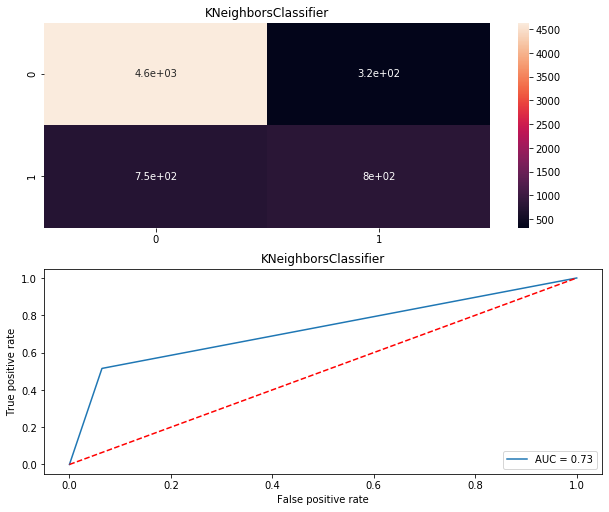

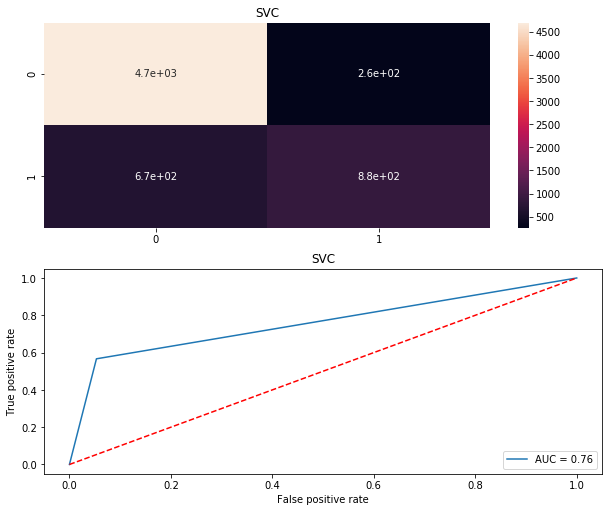

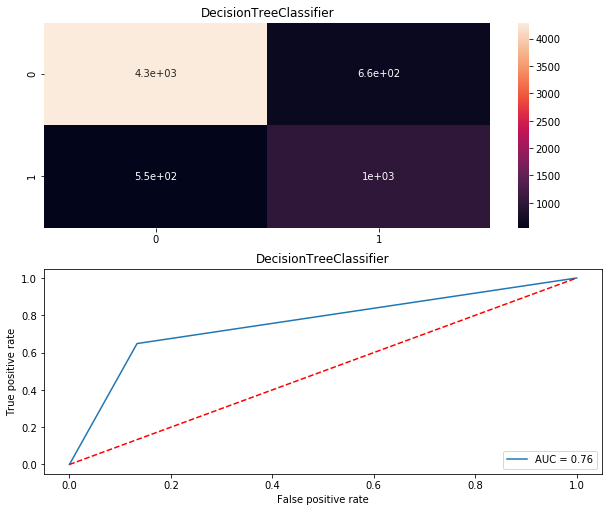

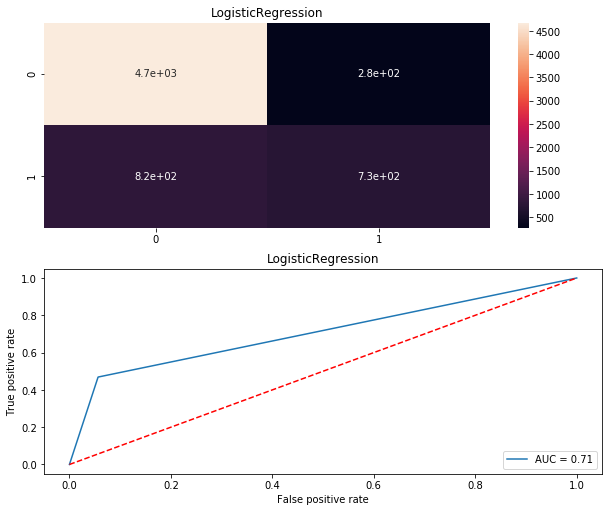

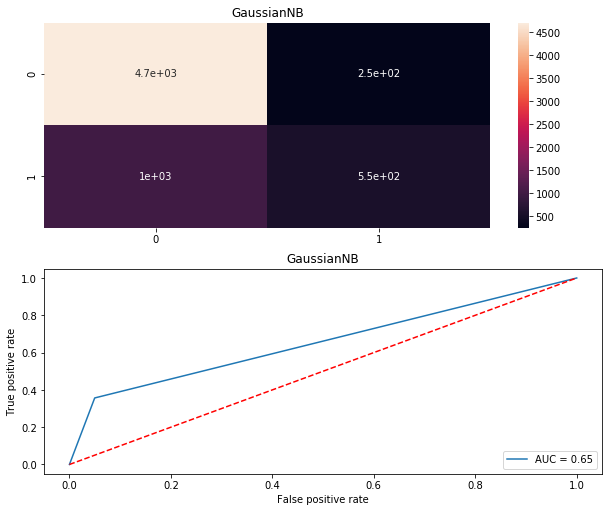

In [31]:
# Now using for loop we calculating each and every parameter in a single cell
Model = []
score = []
cvs = []
rocscore = []

for name,model in models:
    print("***************************************",name,"***************************************************")
    print("\n")
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pre=model.predict(x_test)
    print("\n")
    AS=accuracy_score(y_test,pre)
    print("Accuracy score=",AS)
    score.append(AS*100)
    print("\n")
    sc=cross_val_score(model,x,y,cv=10,scoring="accuracy").mean()
    print("Cross_Val_score=",sc)
    cvs.append(sc*100)
    print("\n")
    false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,pre)
    roc_auc=auc(false_positive_rate,true_positive_rate)
    print("roc_auc_score=",roc_auc)
    rocscore.append(roc_auc*100)
    print("\n")
    print("classification_report\n",classification_report(y_test,pre))
    print("\n")
    cm=confusion_matrix(y_test,pre)
    print(cm)
    print("\n")
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
    plt.title(name)
    plt.plot(false_positive_rate,true_positive_rate,label='AUC = %0.2f'%roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.ylabel("True positive rate")
    plt.xlabel("False positive rate")
    print("\n\n")

In [32]:
# printing all  results obtained above in a dataframe
result=pd.DataFrame({"Model":Model,"Accuracy_score":score,"Cross_val_score":cvs,"Roc_auc_curve":rocscore})
result

,Model,Accuracy_score,Cross_val_score,Roc_auc_curve
0,KNeighborsClassifier,83.553440,83.037469,72.550309
1,SVC,85.611179,84.861794,75.670433
2,DecisionTreeClassifier,81.464988,81.062654,75.756470
3,LogisticRegression,83.031327,82.484644,70.615356
4,GaussianNB,80.866093,80.365479,65.346024


(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

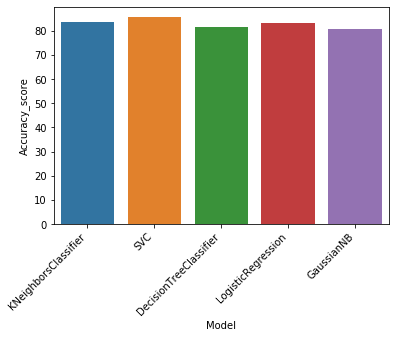

In [33]:
# visualizing all  results obtained
sns.barplot(x="Model",y="Accuracy_score",data=result)
plt.xticks(rotation=45,ha="right")

In [35]:
# Now lets use RandomForestClassifier algorithm to check whether our results gets boosted or not
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=200,criterion="entropy")
rf.fit(x,y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [36]:
# fitting above model our training data set
model=rf
rf.fit(x_train,y_train)
pre=rf.predict(x_test)
AS=accuracy_score(y_test,pre)
print(AS*100)

86.40970515970517


In [37]:
# Using GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
gd=GradientBoostingClassifier(n_estimators=500,learning_rate=0.01)
gd.fit(x,y)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.01, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=500,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [38]:
# fitting above model our training data set
model=gd
gd.fit(x_train,y_train)
pre=gd.predict(x_test)
AS=accuracy_score(y_test,pre)
print(AS*100)

86.3943488943489


In [39]:
# Now lets use ada boost classifier algorithm
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier(n_estimators=500,learning_rate=0.01)
ada.fit(x,y)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.01,
                   n_estimators=500, random_state=None)

In [40]:
# fitting above model our training data set
model=ada
ada.fit(x_train,y_train)
pre=ada.predict(x_test)
AS=accuracy_score(y_test,pre)
print(AS*100)

84.78194103194103


*RandomForestClassifier outperfomed KNeighborsClassifier ,DecisionTreeClassifier,GradientBoostingClassifier,
 AdaBoostClassifier with an accuracy of 86.41 appx.

In [41]:
# saving the best model here i.e. RandomForestClassifier
from sklearn.externals import joblib

In [42]:
joblib.dump(rf,"rfadult.obj")

['rfadult.obj']

In [43]:
model=joblib.load("rfadult.obj")

In [44]:
model.predict(x_test)

array([0, 0, 0, ..., 1, 0, 0])